# Machine Learning
Yorick Juffer - s1993623 \
Leon Koole - s4436563 \
... \
Alejandro Sánchez Roncero - s5279402

## Libraries

In [6]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

import tensorflow.keras as keras
from tensorflow.keras import layers, models

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix 

# new contribution
from sklearn import svm

# Loading data
This dataset contains 2000 grayscale images of handwritten digits, 200 from each class. The images are 15 × 16 
sized, making for n = 240 dimensional image vectors. The data are in the attached text file mfeat-pix.txt, 
one vector per row, sorted such that the first 200 rows are "0" digit examples, the next 200 are "1" digit examples 
etc. The grayscale encoding in mfeat-pix.txt is done by integer steps from 0 (white) to 6 (black). 

In [14]:
# Load lines from mfeat-pix.txt
features = open('mfeat-pix.txt').readlines()

# Create labels for each line, 0-9 for each 200 lines
labels = []
for i in range(10):
  for j in range(200):
    labels.append(i)
labels = np.array(labels)

# Convert each line to a numpy array
for i in range(len(features)):
  features[i] = np.array(features[i].split()).astype('float').reshape(16*15)
  # Normalize
  features[i] = features[i] / 6
features = np.array(features)

In [15]:
# reshape features to be one dimension
features.shape

(2000, 240)

# Plot stuff

6


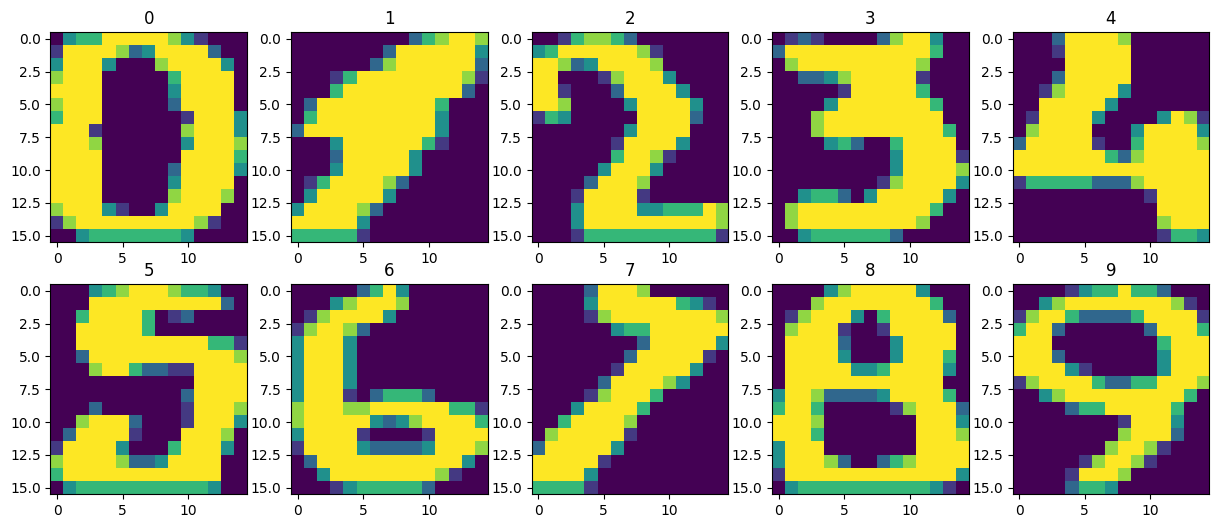

In [4]:
print(labels[1200])

fig, axs = plt.subplots(2, 5, figsize=(15, 6))
for i in range(2):
  for j in range(5):
    axs[i, j].imshow(features[(5*i+j)*200], cmap='viridis', interpolation='nearest')
    axs[i, j].set_title(labels[(5*i+j)*200])


## Split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=40)

# SVM Model

In [18]:
# grid search over the different parameters

model = svm.SVC(decision_function_shape='ovo', c=1, kernel="rbf") # decision function: ovo, ovr | 
# kernel: linear, polynomial, rbg, sigmoid
model.fit(X_train, y_train)

SVC(decision_function_shape='ovo')

In [ ]:
model.summary()

## Compile and train

In [207]:
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
50/50 [==============================] - 1s 12ms/step - loss: 7.3823e-04 - accuracy: 1.0000 - val_loss: 0.1615 - val_accuracy: 0.9825
Epoch 2/100
50/50 [==============================] - 0s 8ms/step - loss: 0.0036 - accuracy: 0.9987 - val_loss: 0.1618 - val_accuracy: 0.9850
Epoch 3/100
50/50 [==============================] - 0s 8ms/step - loss: 6.2592e-04 - accuracy: 1.0000 - val_loss: 0.1588 - val_accuracy: 0.9850
Epoch 4/100
50/50 [==============================] - 0s 8ms/step - loss: 0.0058 - accuracy: 0.9981 - val_loss: 0.1315 - val_accuracy: 0.9875
Epoch 5/100
50/50 [==============================] - 1s 12ms/step - loss: 0.0032 - accuracy: 0.9994 - val_loss: 0.1530 - val_accuracy: 0.9875
Epoch 6/100
50/50 [==============================] - 0s 7ms/step - loss: 0.0089 - accuracy: 0.9981 - val_loss: 0.1533 - val_accuracy: 0.9825
Epoch 7/100
50/50 [==============================] - 0s 7ms/step - loss: 0.0041 - accuracy: 0.9975 - val_loss: 0.1783 - val_accuracy: 0.9850
Epo

### Evaluate model

13/13 - 0s - loss: 0.1137 - accuracy: 0.9875 - 166ms/epoch - 13ms/step


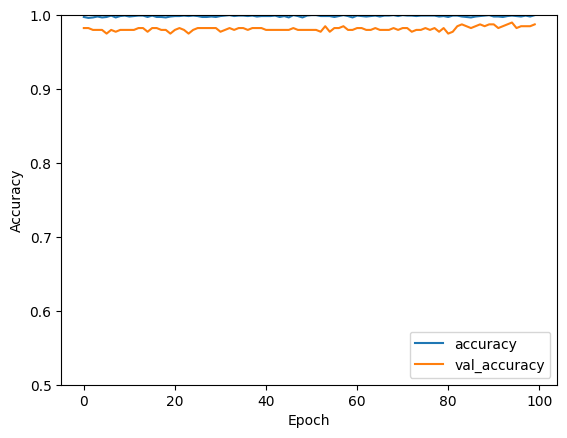

In [205]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

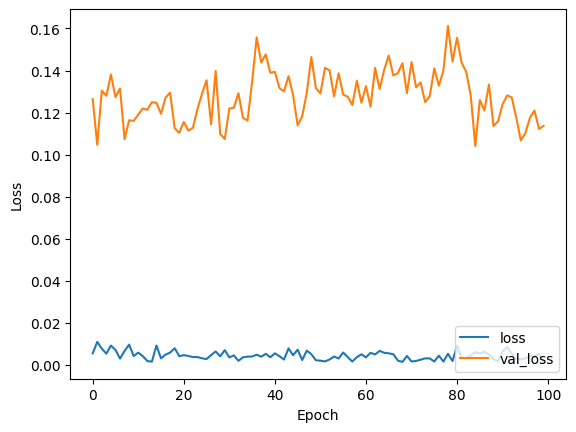

In [206]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

# NEW IDEAS
- data augmentation
- automatic features extraction (non-linear extraction) + linear regression
- ensemble of classifiers -> reference papers
- include operations